# Лабораторная работа №2

ФИО:   Толабаев Минкаил Адамович
Группа: БИВТ-22-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('JobSurveyIndia.csv')  

In [35]:
data.head(3)

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K


In [36]:
data.tail(3)

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K
399,399,Entrepreneurship,Non-Technical,Yes,No,6.0,900K-1200K


In [5]:
data

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


## 2. Описание постановки задачи

Перед тем как обучать модель по колонке IdealYearlyIncome 70/20/10. Проведем EDA.

1. Распределение целевой переменной 
2. Основная информация по датасету
3. Дополнительный анализ


## 3. Распределение целевой переменной


In [23]:
Y = data['IdealYearlyIncome']
X = data.drop('IdealYearlyIncome', axis=1)

In [24]:
X

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays
0,0,Private Sector,Technical,No,Yes,4.0
1,1,Private Sector,Art,No,Yes,4.0
2,2,Government Sector,Technical,No,Yes,6.0
3,3,Government Sector,Non-Technical,Yes,Yes,4.0
4,4,Private Sector,Technical,No,Yes,5.0
...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0
396,396,Government Sector,Non-Technical,Yes,No,4.0
397,397,Government Sector,Non-Technical,Yes,No,4.0
398,398,Government Sector,Non-Technical,No,No,5.0


In [25]:
Y

0      More Than 1500K
1            600K-900K
2           900K-1200K
3           900K-1200K
4          1200K-1500K
            ...       
395          600K-900K
396         900K-1200K
397         900K-1200K
398    More Than 1500K
399         900K-1200K
Name: IdealYearlyIncome, Length: 400, dtype: object

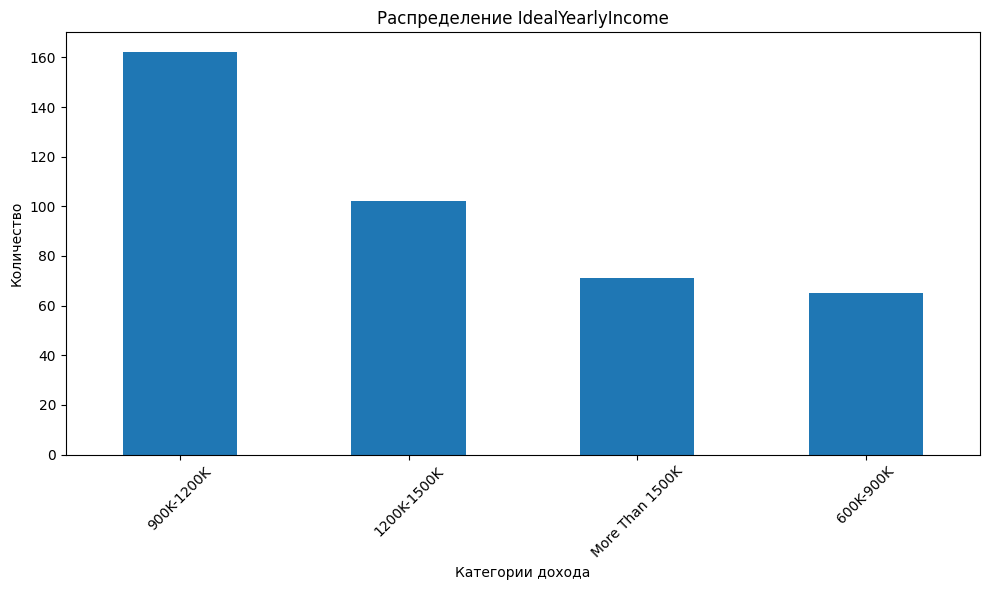

In [28]:
plt.figure(figsize=(10, 6))
Y.value_counts().plot(kind='bar')
plt.title('Распределение IdealYearlyIncome')
plt.xlabel('Категории дохода')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Основные статистики


In [6]:
data.describe()

,Unnamed: 0,IdealNumberOfWorkdays
count,400.000000,400.000000
mean,199.500000,4.902500
std,115.614301,0.805989
min,0.000000,4.000000
25%,99.750000,4.000000
50%,199.500000,5.000000
75%,299.250000,5.000000
max,399.000000,7.000000


## 5. Основная информация по датасету

In [12]:
len(data.columns) # Количество столбцов

7

In [15]:
data.dtypes # Типы столбцов

Unnamed: 0                 int64
Employment Sector         object
Employment Background     object
Public Dealing            object
Degree                    object
IdealNumberOfWorkdays    float64
IdealYearlyIncome         object
dtype: object

## 6. Количество пропусков

In [13]:
data.isna().sum() # Количество пропусков

Unnamed: 0               0
Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

## 7. Гистограммы 5 признаков датасета

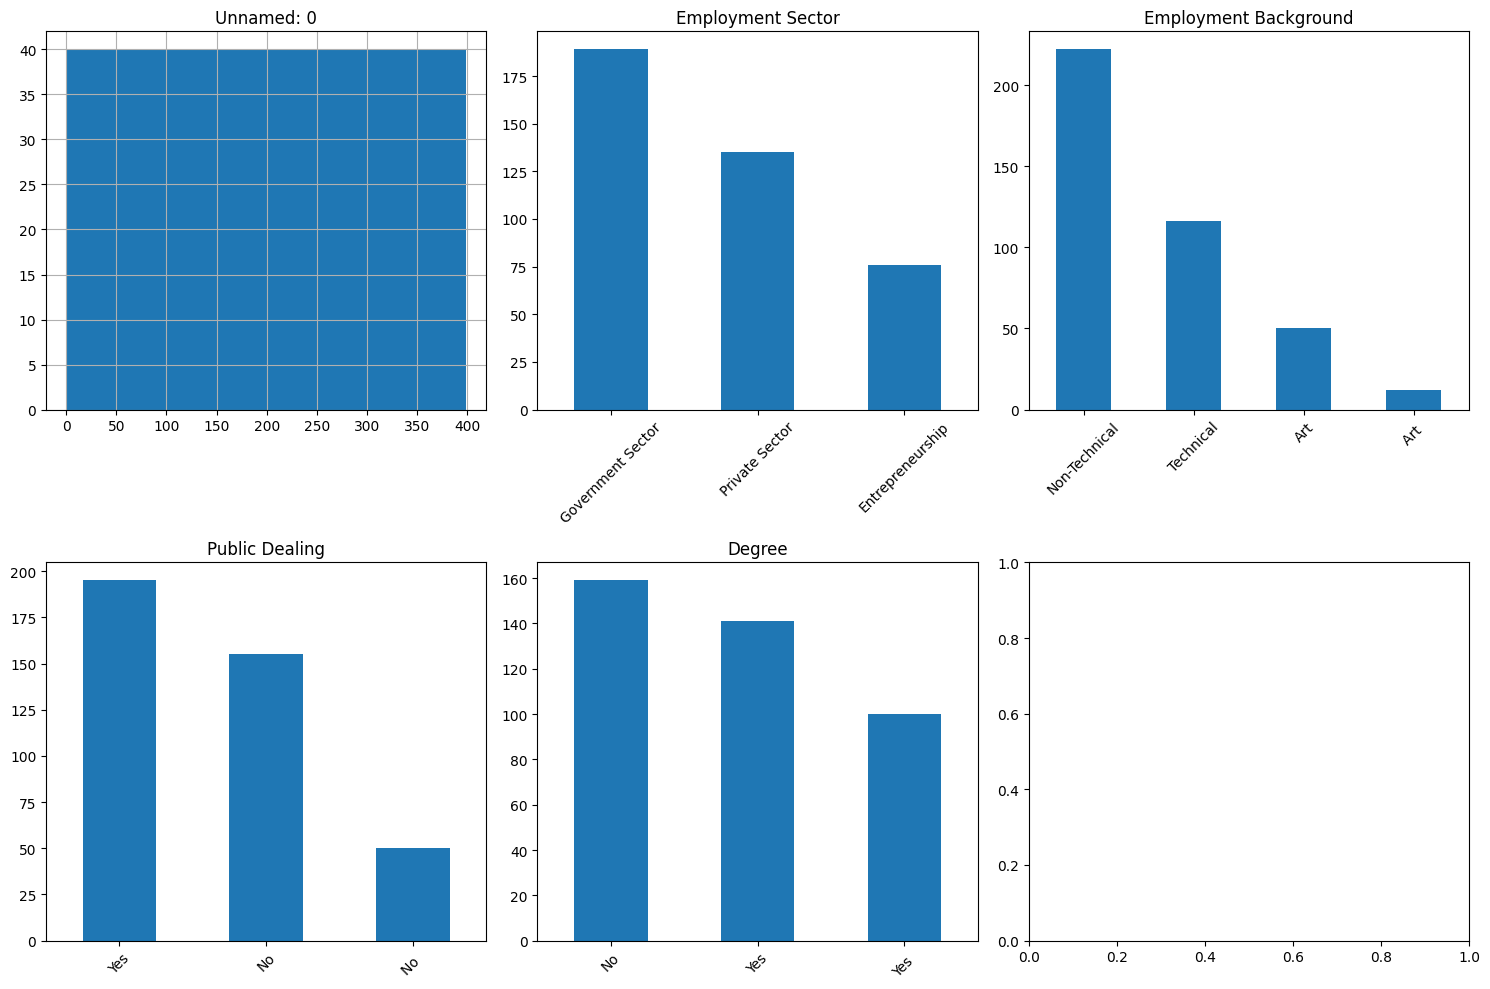

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(X.columns[:5]):
    if X[col].dtype == 'object':
        X[col].value_counts().plot(kind='bar', ax=axs[i])
    else:
        X[col].hist(ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    if X[col].dtype == 'object':
        axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Графики зависимости 5 переменных от целевой

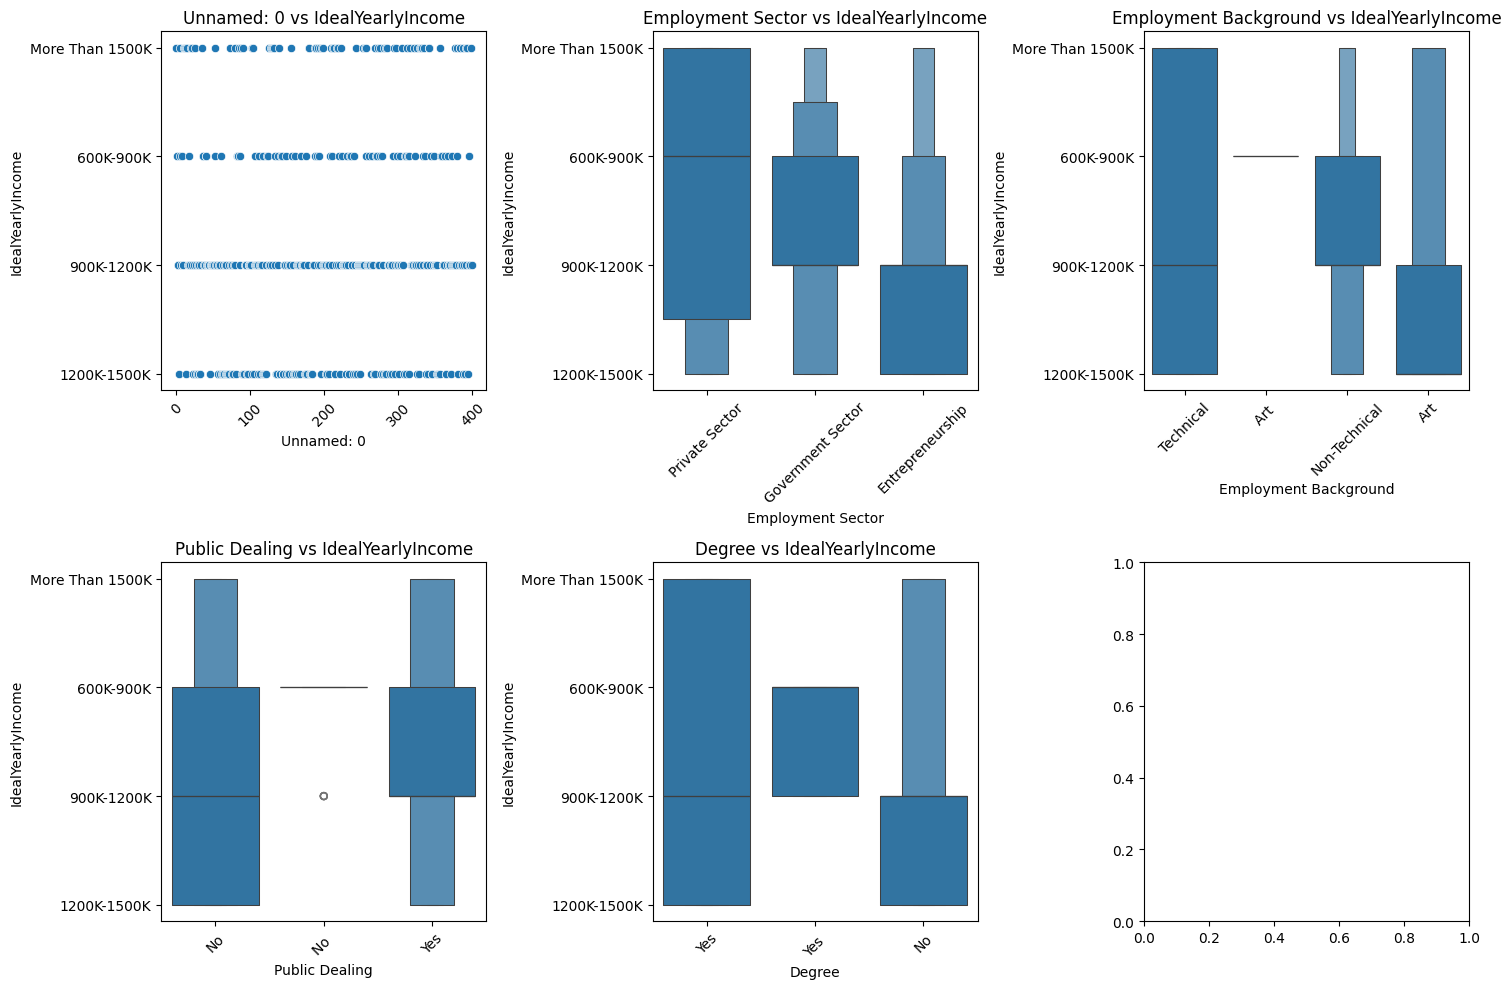

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(X.columns[:5]):
    if X[col].dtype == 'object':
        sns.boxenplot(x=col, y='IdealYearlyIncome', data=data, ax=axs[i])
    else:
        sns.scatterplot(x=col, y='IdealYearlyIncome', data=data, ax=axs[i])
    axs[i].set_title(f'{col} vs IdealYearlyIncome')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Extra

мы написали тепловую карту, которая показывает, 
как сочетание двух категориальных переменных ('Employment Sector' и 'Employment Background') 
влияет на наиболее часто встречающуюся категорию идеального годового дохода.

C:\Users\MInKA\AppData\Local\Temp\ipykernel_8596\315930805.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_numeric = pivot_table.applymap(lambda x: income_map.get(x, -1))


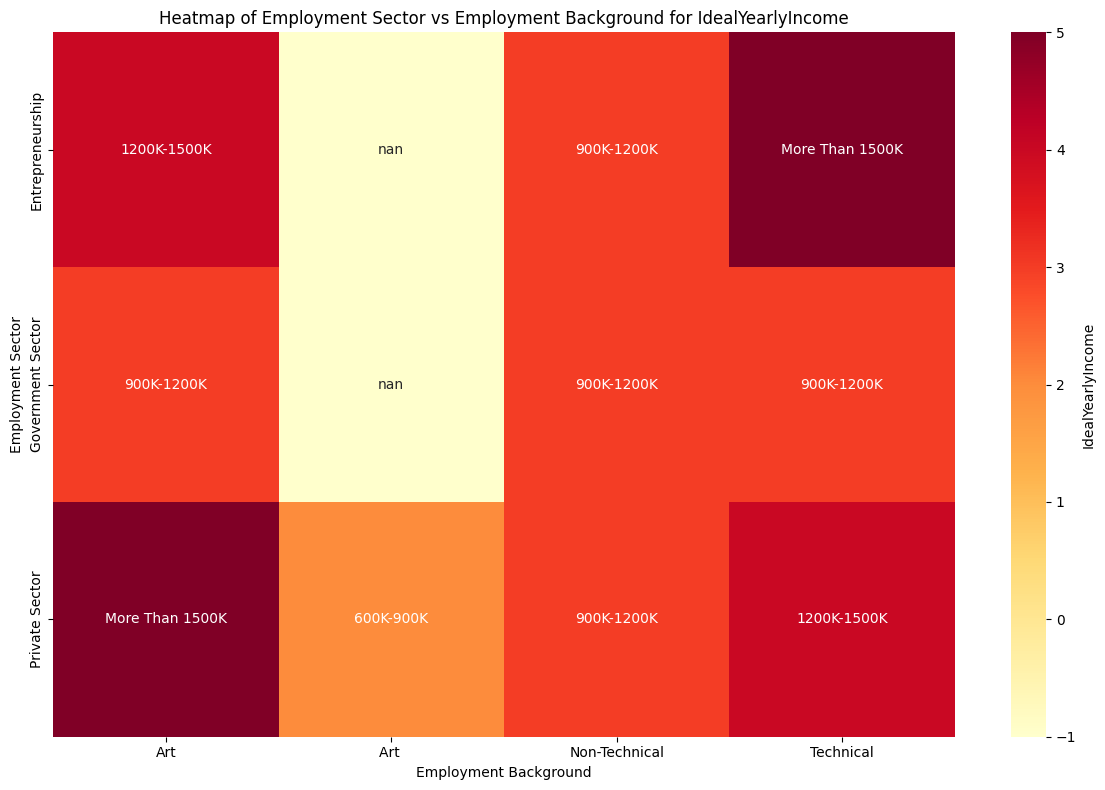

Employment Background              Art       Art  Non-Technical  \
Employment Sector                                                 
Entrepreneurship           1200K-1500K        NaN    900K-1200K   
Government Sector           900K-1200K        NaN    900K-1200K   
Private Sector         More Than 1500K  600K-900K    900K-1200K   

Employment Background        Technical  
Employment Sector                       
Entrepreneurship       More Than 1500K  
Government Sector           900K-1200K  
Private Sector             1200K-1500K  


In [33]:
feature1 = 'Employment Sector'
feature2 = 'Employment Background'

pivot_table = pd.pivot_table(data, 
                             values='IdealYearlyIncome', 
                             index=feature1, 
                             columns=feature2, 
                             aggfunc=lambda x: x.value_counts().index[0])

income_order = ['Less Than 300K', '300K-600K', '600K-900K', '900K-1200K', '1200K-1500K', 'More Than 1500K']
income_map = {income: i for i, income in enumerate(income_order)}
pivot_table_numeric = pivot_table.applymap(lambda x: income_map.get(x, -1))

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_numeric, annot=pivot_table, fmt='', cmap='YlOrRd', cbar_kws={'label': 'IdealYearlyIncome'})
plt.title(f'Heatmap of {feature1} vs {feature2} for IdealYearlyIncome')
plt.tight_layout()
plt.show()

print(pivot_table)